Libraries preparation

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Download data

You can find the data at kaggle https://www.kaggle.com/datasets/davinwijaya/customer-retention

In [6]:
df=pd.read_csv('data.csv')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


# Questions

1) What is the zip code most purchased from the ads?

2) The relationship between customers who received a discount and purchases?

3) Customers who get an offer do they buy?

4) What are the channels that customers use the most and buy through?

# Data exploration and cleaning

In [7]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


In [9]:
df.describe()

,recency,history,used_discount,used_bogo,is_referral,conversion
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,5.763734,242.085656,0.551031,0.549719,0.502250,0.146781
std,3.507592,256.158608,0.497393,0.497526,0.499999,0.353890
min,1.000000,29.990000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,64.660000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,158.110000,1.000000,1.000000,1.000000,0.000000
75%,9.000000,325.657500,1.000000,1.000000,1.000000,0.000000
max,12.000000,3345.930000,1.000000,1.000000,1.000000,1.000000


In [10]:
df['conversion'].value_counts()

0    54606
1     9394
Name: conversion, dtype: int64

In [11]:
df['used_discount'].value_counts()

1    35266
0    28734
Name: used_discount, dtype: int64

#### the details of zip_code 

In [12]:
df['zip_code'].unique()

array(['Surburban', 'Rural', 'Urban'], dtype=object)

In [13]:
df['zip_code'].nunique()

3

In [14]:
df['zip_code'].value_counts()

Surburban    28776
Urban        25661
Rural         9563
Name: zip_code, dtype: int64

#### offer items and their number

In [15]:
df['offer'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

In [16]:
df['offer'].nunique()

3

In [17]:
df['offer'].value_counts()

Buy One Get One    21387
Discount           21307
No Offer           21306
Name: offer, dtype: int64

In [18]:
df['zip_code'].value_counts()

Surburban    28776
Urban        25661
Rural         9563
Name: zip_code, dtype: int64

#### channel items and their number

In [19]:
df['channel'].unique()

array(['Phone', 'Web', 'Multichannel'], dtype=object)

In [20]:
df['channel'].nunique()

3

In [21]:
df['channel'].value_counts()

Web             28217
Phone           28021
Multichannel     7762
Name: channel, dtype: int64

#### Check for nulls

In [23]:
df.isna().sum()

recency          0
history          0
used_discount    0
used_bogo        0
zip_code         0
is_referral      0
channel          0
offer            0
conversion       0
dtype: int64

#### Check for duplicates

In [24]:
df.duplicated().sum()

6603

#### Create a new data frame and delete duplicates

In [25]:
df_2=df.drop_duplicates()
df_2

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63994,7,86.46,0,1,Urban,0,Web,Discount,0
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [26]:
df_2.duplicated().sum()

0

In [27]:
df_2.sample(10)

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
30392,1,1030.85,1,0,Rural,1,Phone,No Offer,0
29736,7,82.12,0,1,Urban,0,Phone,No Offer,1
48478,12,803.61,0,1,Urban,1,Phone,No Offer,0
21112,12,31.94,1,0,Surburban,0,Phone,Discount,0
29927,6,315.04,1,0,Surburban,0,Phone,Buy One Get One,0
1689,10,56.35,0,1,Urban,0,Phone,Discount,0
5249,12,29.99,0,1,Surburban,1,Web,Discount,1
42517,9,183.27,1,0,Urban,0,Phone,Discount,0
8607,10,134.20,1,0,Urban,1,Phone,Buy One Get One,0
4054,3,60.98,0,1,Urban,0,Phone,Buy One Get One,0


# analysis stage

#### 1) What is the zip code most purchased from the ads?

In [47]:
df_2.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [247]:
df_2[df['conversion']==1].groupby('zip_code').count()['conversion']

C:\Users\أحمد العمودي\AppData\Local\Temp\ipykernel_18668\736415863.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['conversion']==1].groupby('zip_code').count()['conversion']


zip_code
Rural        1755
Surburban    3807
Urban        3399
Name: conversion, dtype: int64

#### Here we see that the people of the suburbs are the most buying than others

C:\Users\أحمد العمودي\AppData\Local\Temp\ipykernel_18668\1009854815.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[df['conversion']==1].groupby('zip_code').sum()['conversion'].plot.bar( color ='maroon')


Text(0.5, 1.0, 'Most conversion zip code')

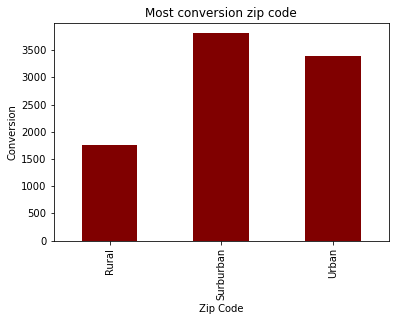

In [200]:
df_2[df['conversion']==1].groupby('zip_code').sum()['conversion'].plot.bar( color ='maroon')
plt.xlabel('Zip Code')
plt.ylabel('Conversion')
plt.title('Most conversion zip code')

### 2) The relationship between customers who received a discount and purchases?

##### The number of purchases made by people who received a discount

In [160]:
df_2[df_2['used_discount']==1].count()['conversion']

31932

##### The number of purchases made by people who did not receive a discount

In [145]:
df_2[df_2['used_discount']==0].count()['conversion']

25465

##### We see the relationship between the people who took the discount and the purchases

In [141]:
df_2[['used_discount', 'conversion']].corr()

,used_discount,conversion
used_discount,1.000000,0.009534
conversion,0.009534,1.000000


In [180]:
df_3=df_2[['used_discount','conversion']].value_counts().reset_index(name='count')
df_3

,used_discount,conversion,count
0,1,0,26848
1,0,0,21588
2,1,1,5084
3,0,1,3877


In [181]:
df_3["used_discount"].replace(1,'yes', inplace=True)
df_3["used_discount"].replace(0,'no', inplace=True)
df_3["conversion"].replace(1,'yes', inplace=True)
df_3["conversion"].replace(0,'no', inplace=True)
df_3

,used_discount,conversion,count
0,yes,no,26848
1,no,no,21588
2,yes,yes,5084
3,no,yes,3877


##### Through the analysis, we found that there is a relationship between people who get a discount that they buy more than people who do not get a discount.

###  3) Customers who get an offer do they buy?

In [186]:
df_4=df_2[['offer','conversion']].value_counts().reset_index(name='count')
df_4

,offer,conversion,count
0,No Offer,0,16883
1,Buy One Get One,0,16090
2,Discount,0,15463
3,Discount,1,3703
4,Buy One Get One,1,3069
5,No Offer,1,2189


<AxesSubplot:xlabel='offer', ylabel='count'>

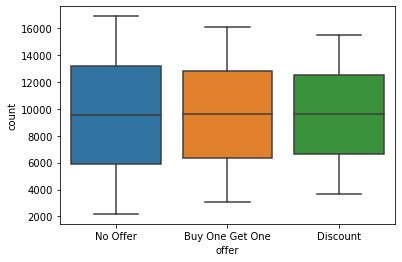

In [227]:
sns.boxplot(x="offer", y="count", data=df_4)

##### We found that the customers who get the discount offer are the ones who buy the most, while those who don't get the lowest offer buy the most.

Text(0.5, 1.0, 'Most Converting Offers')

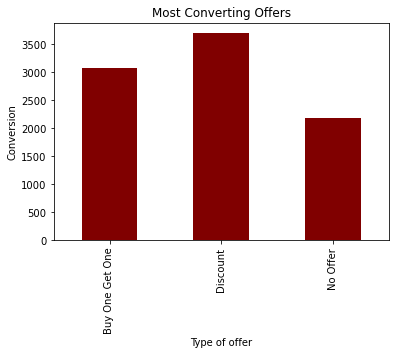

In [199]:
df_4[df_4['conversion']==1].groupby('offer').sum()['count'].plot.bar( color ='maroon')
plt.xlabel('Type of offer')
plt.ylabel('Conversion')
plt.title('Most Converting Offers')

### 4) What are the channels that customers use the most and buy through?

In [214]:
df_2['channel'].value_counts().to_frame()

,channel
Web,24887
Phone,24750
Multichannel,7760


#### We see that web channels are the most used by customers

In [216]:
df_new=df_2[['channel','conversion']].value_counts().reset_index(name='count')
df_new

,channel,conversion,count
0,Phone,0,21352
1,Web,0,20657
2,Multichannel,0,6427
3,Web,1,4230
4,Phone,1,3398
5,Multichannel,1,1333


In [228]:
df_new2=df_new.drop([0,1,2])
df_new2

,channel,conversion,count
3,Web,1,4230
4,Phone,1,3398
5,Multichannel,1,1333


Text(0.5, 1.0, 'Most Converted Channels')

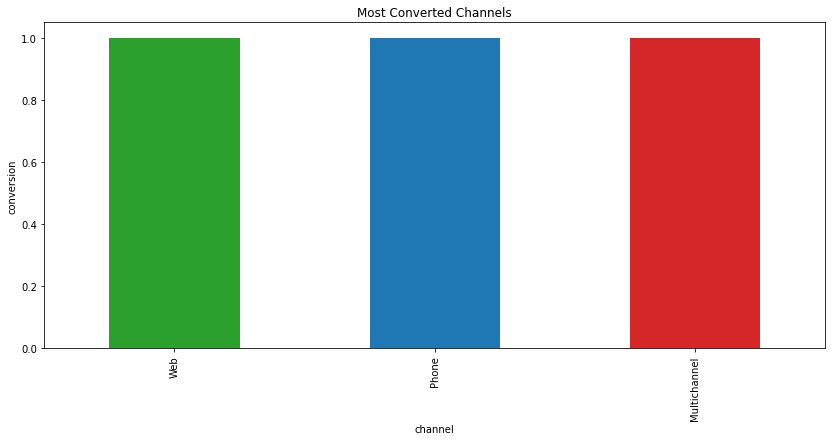

In [243]:
bar_colors = ['tab:green', 'tab:blue', 'tab:red']
ax = df_new2['channel'].value_counts().plot(kind='bar', figsize=(14,6), color=bar_colors)
ax.set_ylabel('conversion')
ax.set_xlabel('channel')
ax.set_title('Most Converted Channels')

# Results:

We have done a data analysis for a marketing campaign program and we have asked many questions and we conclude the following:

We have answered every question

##### 1) What is the zip code most purchased from the ads?

By conducting some analysis on the data, we discovered that suburban people are the most buying than others
We have represented the result in a graph to make it more clear.

##### 2) Is there a relationship between customers who received a discount and purchases?

First, we found the number of purchases made by people who took a discount, which is 31932, and then we found the number of purchases by people who did not take a discount, which is 25465.

After that, we made the relationship between the people who took the discount and the purchases, where we found that the correlation ratio is very low, which is 0.009534
As well as the people who bought a small number of 5084 compared to others who did not get a discount.

#### 3) Customers who get an offer do they buy?

The customers who get the discount offer are the ones who buy the most and then the buy one get one free offer.

##### 4) What are the channels that customers use the most and buy through?

The web is the most used channel for easy access from any device, be it a phone or a computer.